# Forecast Evaluations

### Classic Train/Test Split

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline

In [3]:
df = pd.read_csv('D:/ML-Datasets/Udemy-TimeSeries/Miles_Traveled.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [4]:
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [5]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


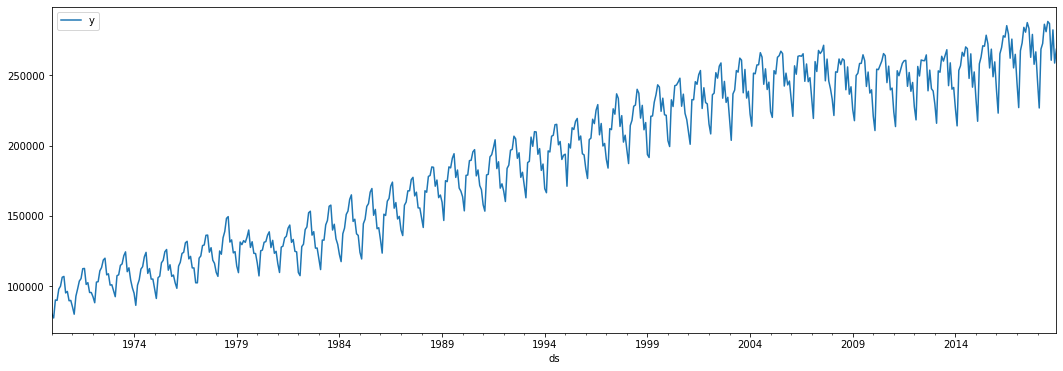

In [6]:
df.plot(x='ds', y='y', figsize=(18, 6))

In [7]:
len(df)

588

In [8]:
len(df) - 12

576

In [9]:
train = df.iloc[:576]
test = df.iloc[576:]

In [10]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263219.378669,274155.040297,285534.766837,263181.222602,263281.012252,16451.125033,16451.125033,16451.125033,16451.125033,16451.125033,16451.125033,0.0,0.0,0.0,279670.503702
584,2018-09-01,263357.665883,255732.340367,267229.331370,263299.466296,263448.589664,-1666.545411,-1666.545411,-1666.545411,-1666.545411,-1666.545411,-1666.545411,0.0,0.0,0.0,261691.120472
585,2018-10-01,263491.492218,262866.648445,274421.009345,263409.954288,263611.212272,5310.587893,5310.587893,5310.587893,5310.587893,5310.587893,5310.587893,0.0,0.0,0.0,268802.080112
586,2018-11-01,263629.779432,249963.452624,261072.934120,263518.328256,263775.481265,-8203.436940,-8203.436940,-8203.436940,-8203.436940,-8203.436940,-8203.436940,0.0,0.0,0.0,255426.342492
587,2018-12-01,263763.605767,250865.204739,262373.887819,263622.033056,263947.165737,-6916.514689,-6916.514689,-6916.514689,-6916.514689,-6916.514689,-6916.514689,0.0,0.0,0.0,256847.091078


In [13]:
test.tail()

,ds,y
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0
587,2018-12-01,268413.0


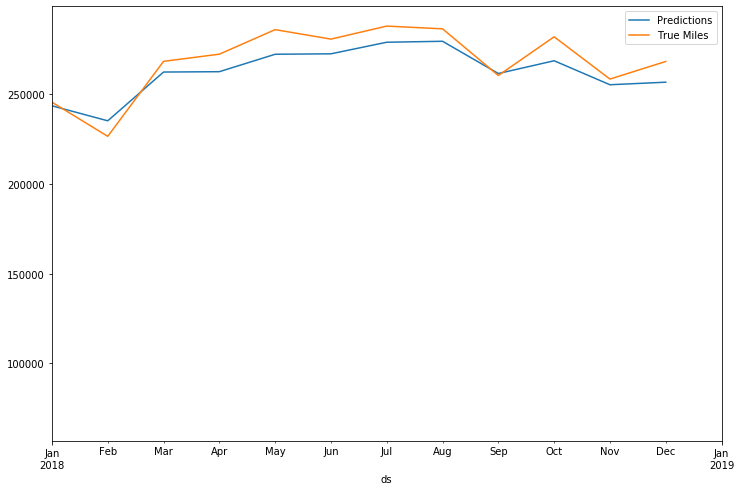

In [15]:
ax = forecast.plot(x='ds', y='yhat', label='Predictions', legend=True, figsize=(12, 8))
test.plot(x='ds', y='y', label='True Miles', legend=True, ax=ax, xlim=('2018-01-01', '2019-01-01'))

In [16]:
from statsmodels.tools.eval_measures import rmse
predictions = forecast.iloc[-12:]['yhat']
predictions

576    243683.663737
577    235311.776917
578    262511.200772
579    262708.863987
580    272429.495856
581    272679.913346
582    279136.474721
583    279670.503702
584    261691.120472
585    268802.080112
586    255426.342492
587    256847.091078
Name: yhat, dtype: float64

In [17]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [18]:
rmse(predictions, test['y'])

8750.25052083061

In [19]:
test.mean()

y    268739.666667
dtype: float64

# Prophet Diagnostics

Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values.

In [20]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [21]:
len(df)

588

In [22]:
len(df)/12

49.0


The initial period should be long enough to capture all of the components of the model, in particular seasonalities and extra regressors: at least a year for yearly seasonality, at least a week for weekly seasonality, etc.

In [23]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 5 years
period = 5 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [24]:
df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


In [25]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087389,107005.210730,109844.166509,102445.0,1976-12-11
1,1977-02-01,102996.111525,101565.937240,104339.390700,102416.0,1976-12-11
2,1977-03-01,118973.318113,117584.035970,120396.504024,119960.0,1976-12-11
3,1977-04-01,120612.923709,119049.452858,122068.260113,121513.0,1976-12-11
4,1977-05-01,127883.031830,126394.445695,129321.646790,128884.0,1976-12-11


In [26]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
103,2017-08-01,273328.467970,267448.739451,279192.746532,283184.0,2016-12-01
104,2017-09-01,255447.843997,249670.395363,261411.326793,262673.0,2016-12-01
105,2017-10-01,262552.901413,256965.605569,268167.463579,278937.0,2016-12-01
106,2017-11-01,249204.331440,243585.309491,254697.140507,257712.0,2016-12-01
107,2017-12-01,250450.721819,244484.729238,255823.210294,266535.0,2016-12-01


In [27]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.437359e+07,4936.961190,4528.637861,0.027750,0.023384,0.4
1,53 days,2.187095e+07,4676.638408,4262.628303,0.024999,0.023384,0.4
2,54 days,1.842045e+07,4291.904691,3732.310696,0.020061,0.022021,0.5
3,55 days,2.351247e+07,4848.965429,4271.125183,0.023241,0.023384,0.4
4,57 days,2.115130e+07,4599.053997,3989.900860,0.021416,0.022021,0.5
...,...,...,...,...,...,...,...
94,360 days,1.862165e+07,4315.281433,3775.153749,0.019707,0.019425,0.5
95,361 days,1.777184e+07,4215.666214,3507.111932,0.018367,0.018879,0.5
96,362 days,3.210247e+07,5665.904399,4435.117794,0.022175,0.024755,0.4
97,364 days,3.022906e+07,5498.095592,4257.907114,0.021507,0.021415,0.5


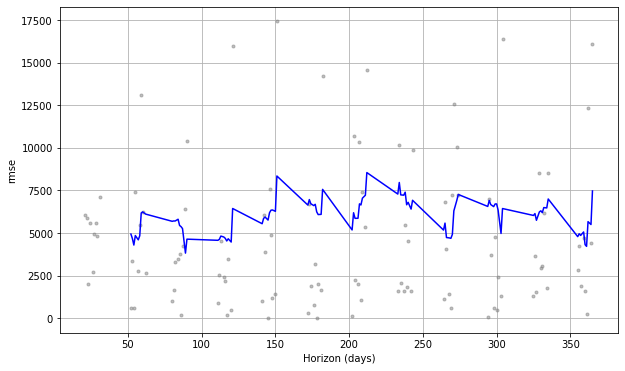

In [28]:
plot_cross_validation_metric(df_cv, metric='rmse');


MAPE is Mean Absolute Percentage Error
https://en.wikipedia.org/wiki/Mean_absolute_percentage_error

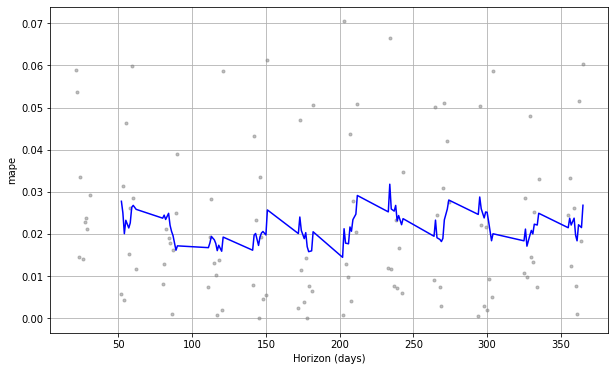

In [29]:
plot_cross_validation_metric(df_cv, metric='mape');

# Trend Changes

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet

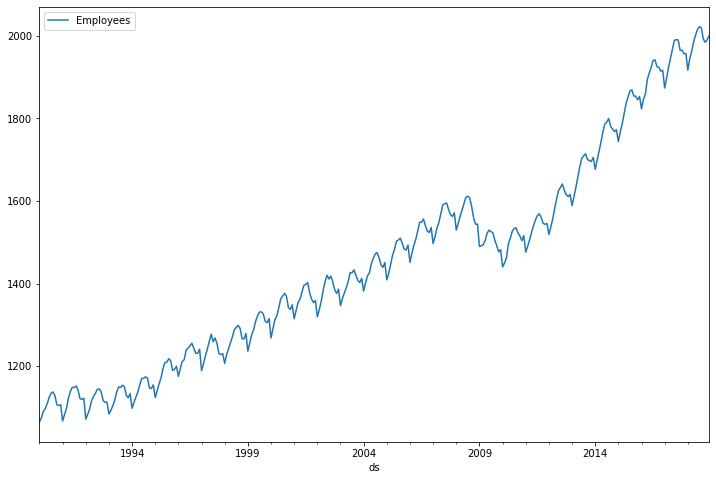

In [31]:
df = pd.read_csv('D:/ML-Datasets/Udemy-TimeSeries/HospitalityEmployees.csv')
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
df.plot(x='ds',y='y',figsize=(12,8),label='Employees')

In [32]:
len(df)

348

In [33]:
len(df) - 12

336

In [34]:
train = df.iloc[:336]
test = df.iloc[336:]

In [35]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


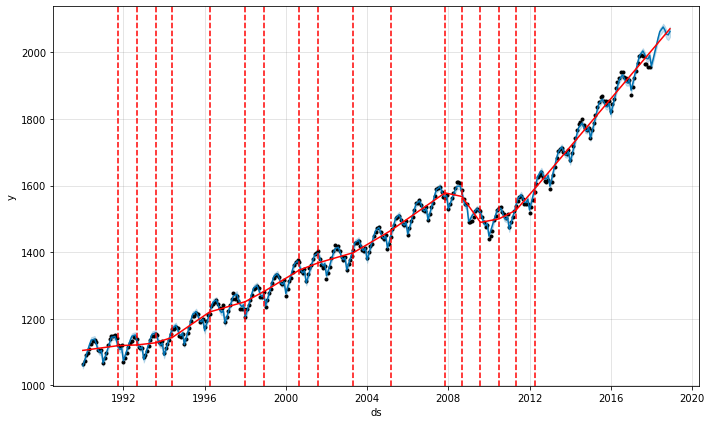

In [36]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# Changing Seasonality

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet

In [38]:
df = pd.read_csv('D:/ML-Datasets/Udemy-TimeSeries/airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [39]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


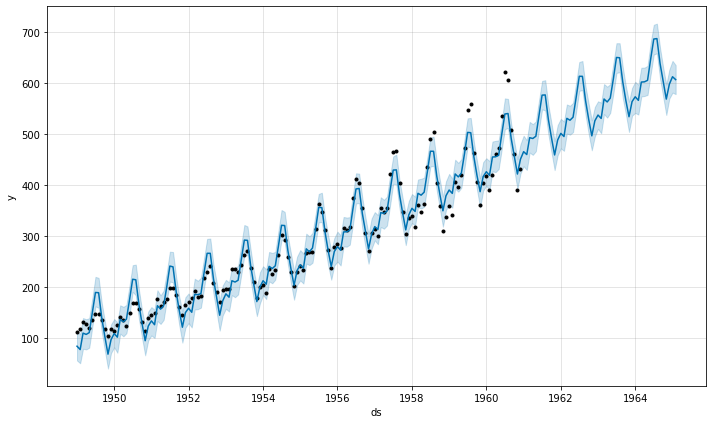

In [40]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

This time series has a clear yearly cycle, but the seasonality in the forecast is too large at the start of the time series and too small at the end. In this time series, the seasonality is not a constant additive factor as assumed by Prophet, rather it grows with the trend. This is multiplicative seasonality.

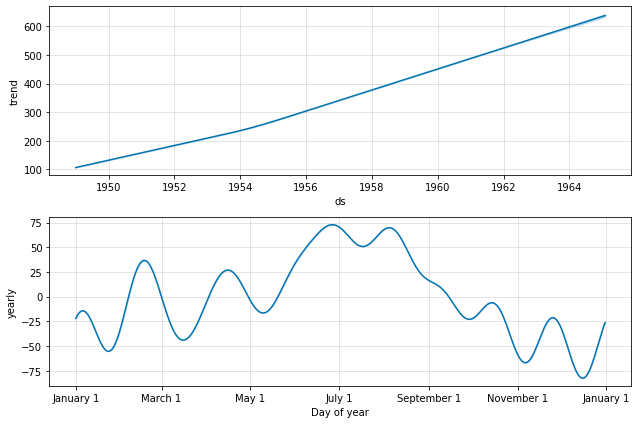

In [41]:
fig = m.plot_components(forecast)

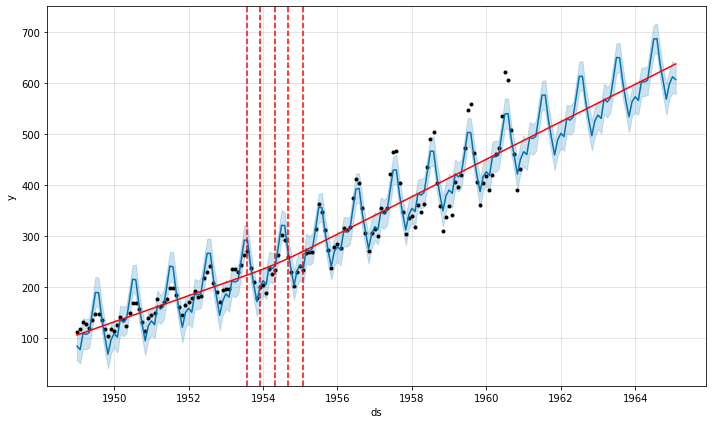

In [42]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### Change to Multiplicative 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


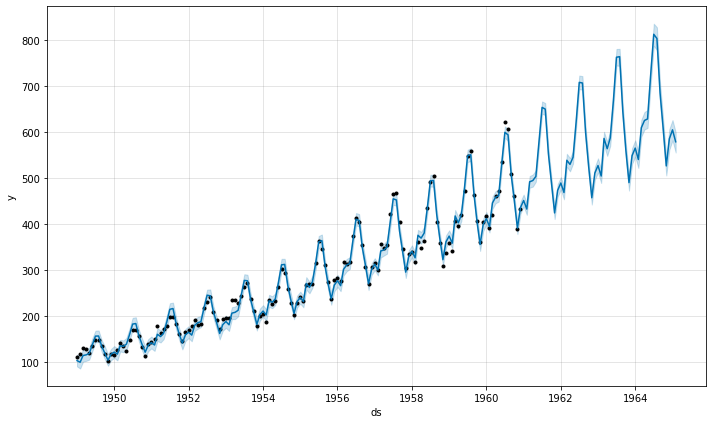

In [43]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)

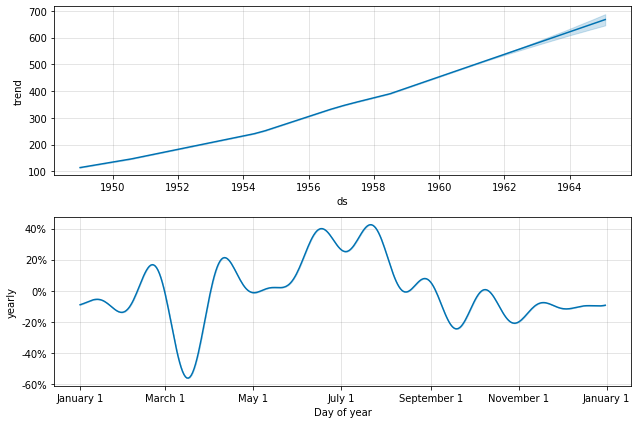

In [44]:
fig = m.plot_components(forecast)

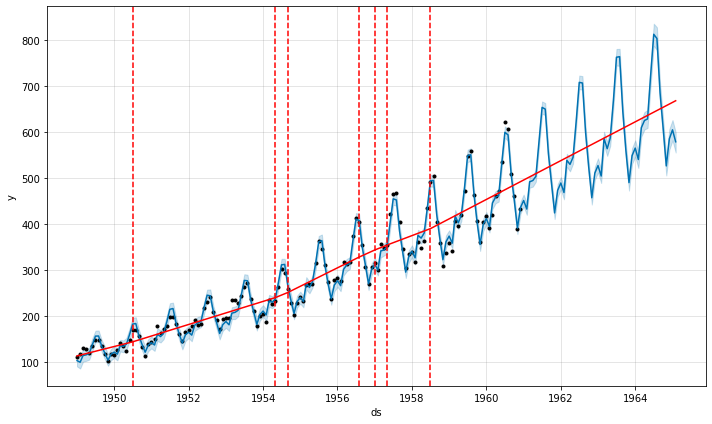

In [45]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)